# Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import ndimage
from scipy.io import loadmat
import pandas as pd
import os
%matplotlib inline

plt.rcParams['figure.facecolor'] = 'white'
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["font.size"] = 16
plt.rcParams["mathtext.fontset"] = "cm"

In [2]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from time_shifted_PID import Histo3D2Dict
from time_shifted_PID import PIfunc
from time_shifted_PID import EqualState
from Spike_Generation import Spike_Time_Generater
from Spike_Generation import NL
from StimulusnResponse import expSnR
from SpatialTemporal_Correlation_and_Convolution import ST_STA
from NGD_TK_AS import NGD2L_TK_AS
from NGD_TK_AS import ParaTrans

importing Jupyter notebook from time_shifted_PID.ipynb
importing Jupyter notebook from J_broja_PID.ipynb
importing Jupyter notebook from Spike_Generation.ipynb
importing Jupyter notebook from StimulusnResponse.ipynb
importing Jupyter notebook from SpatialTemporal_Correlation_and_Convolution.ipynb
importing Jupyter notebook from NGD_TK_AS.ipynb


In [3]:
def angular_gradient(x):
    diffx= np.gradient(x)
    diffx[np.abs(diffx)>0.6*np.pi] -= np.pi*diffx[np.abs(diffx)>0.6*np.pi]/abs(diffx[np.abs(diffx)>0.6*np.pi])
    return diffx

In [4]:
def cm2inch(value):
    return value/2.54

# Figsetup
Using 20200408 Chou's data, unit2.<br>
Using. <br>
shortcaption:Typical TLMI $I(\gamma, \Xi, \delta t)$ from a iP-, a iN-, a mP- and a mN-RGC <br>
label: NPRGC

In [5]:
filename = 'NPRGC'

# LED

In [6]:
Fc_list = [2,4,7,10, np.inf]
file_list = ['D:\\GoogleDrive\\retina\\Chou\'s data\\20200408\\20200408_OU_cutoff=2_sort_unit2',
             'D:\\GoogleDrive\\retina\\Chou\'s data\\20200408\\20200408_OU_cutoff=4_sort_unit2',
             'D:\\GoogleDrive\\retina\\Chou\'s data\\20200408\\20200408_OU_cutoff=7_sort_unit2',
             'D:\\GoogleDrive\\retina\\Chou\'s data\\20200408\\20200408_OU_cutoff=10_sort_unit2',
             'D:\\GoogleDrive\\retina\\Chou\'s data\\20200408\\20200408_OU_original_tau=0p5_sort_unit2']

dt = 0.01
pcn = 53
ncn = 41

In [7]:
x_list = []
T_list = []
prstate_list = []
nrstate_list = []

for file in file_list:
    annots = loadmat(file, squeeze_me = True)
    sampling_rate = 20000
    TimeStamps = annots['TimeStamps']
    x = annots['a_data'][0, int(TimeStamps[0]*sampling_rate):int(TimeStamps[1]*sampling_rate)+1]
    x = ndimage.gaussian_filter1d(x, sigma=int(sampling_rate*dt/2), mode='reflect') / dt
    x = x[::int(sampling_rate*dt)]
    x = x.astype(float)
    x = (x -np.mean(x))/np.std(x)
    T=np.arange(len(x))*dt+dt
    prstate,_ = np.histogram(annots['Spikes'][pcn-1]-TimeStamps[0], np.append(0,T))
    nrstate,_ = np.histogram(annots['Spikes'][ncn-1]-TimeStamps[0], np.append(0,T))
    prstate_list.append( prstate.copy() )
    nrstate_list.append( nrstate.copy() )
    x_list.append( x.copy() )
    T_list.append( T.copy() )

In [8]:
tv_list = [ndimage.gaussian_filter1d(x, order=1, sigma=1)/dt  for x in x_list]

In [9]:
#assign states
state_num = 6
xstate_list = [EqualState(x, state_num)[0] for x in x_list]
tvstate_list = [EqualState(tv, state_num)[0] for tv in tv_list]

In [10]:
window = [-1,1] # second
ip_Information_list = [0]*len(x_list)
in_Information_list = [0]*len(x_list)
for i in range(len(x_list)):
    LEDtimeshift, ip_Information_list[i] = PIfunc(prstate_list[i], xstate_list[i], tvstate_list[i], dt, window)
    LEDtimeshift, in_Information_list[i] = PIfunc(nrstate_list[i], xstate_list[i], tvstate_list[i], dt, window)
# Information_list = Real_Information_list.copy()

# OLED

In [11]:
Fc_list = [1,2,4, np.inf]
file_list = ['D:\\GoogleDrive\\retina\\Chou\'s data\\20210513\\merge\\merge_0727_OUsmooth_Bright_UD_G4.5_5min_Q100_6.5mW_0.5Hz.mat',
             'D:\\GoogleDrive\\retina\\Chou\'s data\\20210513\\merge\\merge_0727_OUsmooth_Bright_UD_G4.5_5min_Q100_6.5mW_1Hz.mat',
             'D:\\GoogleDrive\\retina\\Chou\'s data\\20210513\\merge\\merge_0727_OUsmooth_Bright_UD_G4.5_5min_Q100_6.5mW_2Hz.mat',
             'D:\\GoogleDrive\\retina\\Chou\'s data\\20210513\\merge\\merge_0727_OUsmooth_Bright_UD_G4.5_5min_Q100_6.5mW_4Hz.mat']

dt = 1/60
pcn = 9
ncn = 15

In [12]:
x_list = []
prstate_list = []
nrstate_list = []

for file in file_list:
    annots = loadmat(file, squeeze_me = True)
    x = annots['bin_pos']
    x = (x-np.mean(x))/np.std(x)
    prstate, _ = np.histogram(annots['reconstruct_spikes'][pcn-1], np.arange(len(x)+1)*dt)
    nrstate, _ = np.histogram(annots['reconstruct_spikes'][ncn-1], np.arange(len(x)+1)*dt)
    prstate_list.append( prstate.copy() )
    nrstate_list.append( nrstate.copy() )
    x_list.append( x.copy() )

In [13]:
tv_list = [ndimage.gaussian_filter1d(x, order=1, sigma=1)/dt  for x in x_list]

state_num = 6
xstate_list = [EqualState(x, state_num)[0] for x in x_list]
tvstate_list = [EqualState(tv, state_num)[0] for tv in tv_list]

In [14]:
window = [-1,1] # second
mp_Information_list = [0]*len(x_list)
mn_Information_list = [0]*len(x_list)
for i in range(len(x_list)):
    OLEDtimeshift, mp_Information_list[i] = PIfunc(prstate_list[i], xstate_list[i], tvstate_list[i], dt, window)
    OLEDtimeshift, mn_Information_list[i] = PIfunc(nrstate_list[i], xstate_list[i], tvstate_list[i], dt, window)

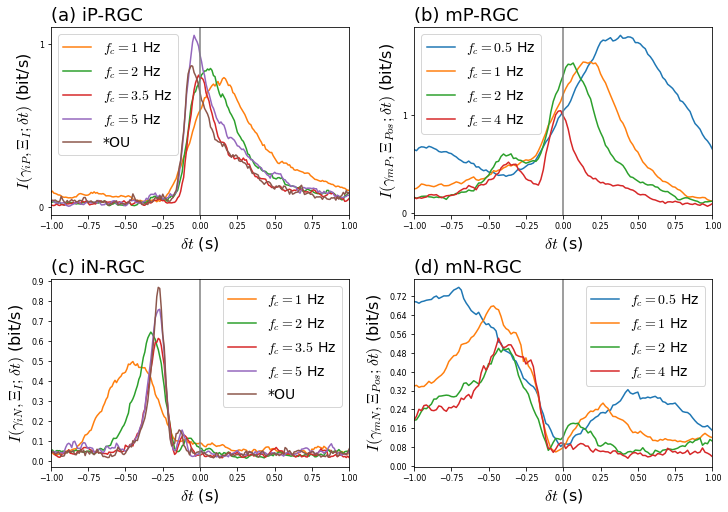

In [20]:
plt.rcParams["font.size"] = 8

fig, ((ax2, ax3), (ax4, ax5)) = plt.subplots(nrows=2, ncols=2, constrained_layout=True)
Information_list = ip_Information_list.copy()
timeshift = LEDtimeshift
for i in range(5):
    ax2.plot(timeshift,Information_list[i][('Beer','UIx')]+Information_list[i][('Beer','Red')], c = plt.cm.tab10(i+1))
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_xlabel(r'$\delta t$ (s)', fontsize = 16)
ax2.set_ylabel(r'$I(\gamma_{iP}, \Xi_I; \delta t)$ (bit/s)', fontsize = 16)
ax2.axvline(0, c = 'gray')
ax2.set_xlim(window)
ax2.set_title('(a) iP-RGC', fontsize = 18, loc = 'left')
ax2.legend( (r'$f_c=1$ Hz', r'$f_c=2$ Hz', r'$f_c=3.5$ Hz', r'$f_c=5$ Hz', '*OU'), loc='best', prop={'size': 14})

Information_list = mp_Information_list.copy()
timeshift = OLEDtimeshift
for i in range(4):
    ax3.plot(timeshift,Information_list[i][('Beer','UIx')]+Information_list[i][('Beer','Red')])
ax3.yaxis.set_major_locator(MaxNLocator(integer=True))
ax3.set_xlabel(r'$\delta t$ (s)', fontsize = 16)
ax3.set_ylabel(r'$I(\gamma_{mP}, \Xi_{Pos}; \delta t)$ (bit/s)', fontsize = 16)
ax3.axvline(0, c = 'gray')
ax3.set_xlim(window)
ax3.set_title('(b) mP-RGC', fontsize = 18, loc = 'left')
ax3.legend( (r'$f_c=0.5$ Hz', r'$f_c=1$ Hz', r'$f_c=2$ Hz', r'$f_c=4$ Hz'), loc='best', prop={'size': 14})

Information_list = in_Information_list.copy()
timeshift = LEDtimeshift
for i in range(5):
    ax4.plot(timeshift,Information_list[i][('Beer','UIx')]+Information_list[i][('Beer','Red')], c = plt.cm.tab10(i+1))
ax4.yaxis.set_major_locator(MaxNLocator(integer=True))
ax4.set_xlabel(r'$\delta t$ (s)', fontsize = 16)
ax4.set_ylabel(r'$I(\gamma_{iN}, \Xi_I; \delta t)$ (bit/s)', fontsize = 16)
ax4.axvline(0, c = 'gray')
ax4.set_xlim(window)
ax4.set_title('(c) iN-RGC', fontsize = 18, loc = 'left')
ax4.legend( (r'$f_c=1$ Hz', r'$f_c=2$ Hz', r'$f_c=3.5$ Hz', r'$f_c=5$ Hz', '*OU'), loc='best', prop={'size': 14})

Information_list = mn_Information_list.copy()
timeshift = OLEDtimeshift
for i in range(4):
    ax5.plot(timeshift,Information_list[i][('Beer','UIx')]+Information_list[i][('Beer','Red')])
ax5.yaxis.set_major_locator(MaxNLocator(integer=True))
ax5.set_xlabel(r'$\delta t$ (s)', fontsize = 16)
ax5.set_ylabel(r'$I(\gamma_{mN}, \Xi_{Pos}; \delta t)$ (bit/s)', fontsize = 16)
ax5.axvline(0, c = 'gray')
ax5.set_xlim(window)
ax5.set_title('(d) mN-RGC', fontsize = 18, loc = 'left')
ax5.legend( (r'$f_c=0.5$ Hz', r'$f_c=1$ Hz', r'$f_c=2$ Hz', r'$f_c=4$ Hz'), loc='best', prop={'size': 14})

fig.set_size_inches(10, 7)

In [21]:
# fig = plt.gcf()
fig.savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\R\\'+filename+'_base.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)

In [17]:
# plt.plot(timeshift-0.2,Information_list[i][('Beer','UIx')]+Information_list[i][('Beer','Red')], 'r-')
# plt.xlabel(r'$\delta t$ (s)', fontsize = 16)
# plt.ylabel(r'$I(\gamma,\xi; \delta t)$ (bit/s)', fontsize = 16)
# plt.axvline(0, c = 'gray')
# plt.xlim([-0.8, 0.8])

# plt.gcf().savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\M\\TLMIintro_base.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)